<a href="https://colab.research.google.com/github/EstebanCarranza-UIS/Parte-pr-ctica-II/blob/main/Parte_pr%C3%A1ctica_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**
En este estudio, se examinará la base de datos $\text{nac2020.csv}$, que contiene datos sobre nacimientos en Colombia, con el propósito de responder preguntas clave acerca de dos variables: la edad de los padres $\text{(EDAD_PADRE)}$ y el número de embarazos $\text{(N_EMB)}$.

Para ello, emplearemos diversas técnicas y herramientas estadísticas. Se dará inicio realizando una visualización de los datos univariados cuantitativos utilizando gráficos, y calcularemos medidas descriptivas fundamentales, como la media y la desviación estándar. A continuación, se hará análisis y relación entre las variables antes mencionadas mediante diagramas de dispersión y regresión lineal, con el objetivo de determinar las medidas descriptivas para datos univariados cuantitativos.

En general, el enfoque del informe estará dirigido a las siguientes interrogativas:

* ¿Cuál es el comportamiento de la variable $\text{EDAD_PADRE}$?
* ¿Cómo se distribuye la variable $\text{N_EMB}$?
* ¿Existe una correlación entre estas variables y cuál es su intensidad

Para abordar estas preguntas, se hará uso de  gráficos, medidas descriptivas, pruebas de normalidad y coeficientes de correlación de Pearson, Kendall y Spearman. Los hallazgos e interpretaciones se presentarán mediante una copia guardada en GitHub proveniente de Google Colaboratory, siendo este último el software que se usará para hacer el análisis de los datos y gráficos.



# **Estadística descriptiva para variables cuantitativas**


*   Gráficos para datos univariados cuantitativos
*   Determinar las medidas descrpitivas para datos univariados cuantitativos



In [1]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_nac2020.csv to asriosgu_nac2020 (1).csv


In [3]:
import pandas as pd
import io
io_csv = io.BytesIO(uploaded['asriosgu_nac2020 (1).csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [4]:
df = tabla[["EDAD_PADRE", "EDAD_MADRE", "N_EMB"]]
df.head(3)

,EDAD_PADRE,EDAD_MADRE,N_EMB
COD_DPTO,,,
44,20,4,1
44,20,4,1
44,20,5,1


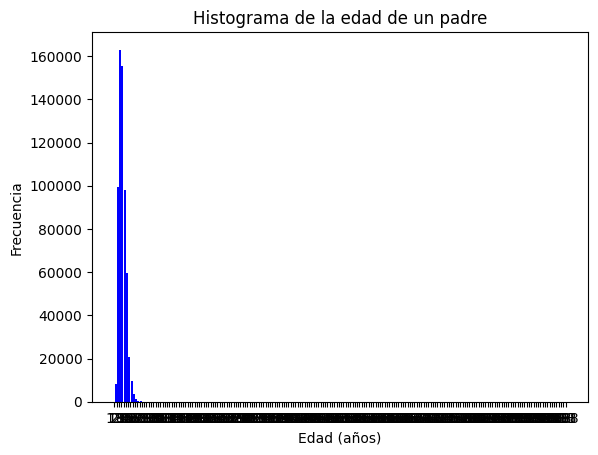

In [5]:
import matplotlib.pyplot as plot
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5)
plot.hist(df.EDAD_PADRE, bins=intervalos, color='blue', rwidth=0.85)
plot.title('Histograma de la edad de un padre')
plot.xlabel('Edad (años)')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
plot.show()

In [6]:
df1 = df[(df.EDAD_PADRE < 120) & (df.EDAD_MADRE != 99) & (df.N_EMB != 99)]
df1.head(5)

,EDAD_PADRE,EDAD_MADRE,N_EMB
COD_DPTO,,,
44,20,4,1
44,20,4,1
44,20,5,1
44,20,5,1
44,20,3,1


<ipython-input-7-985ec102be2c>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")


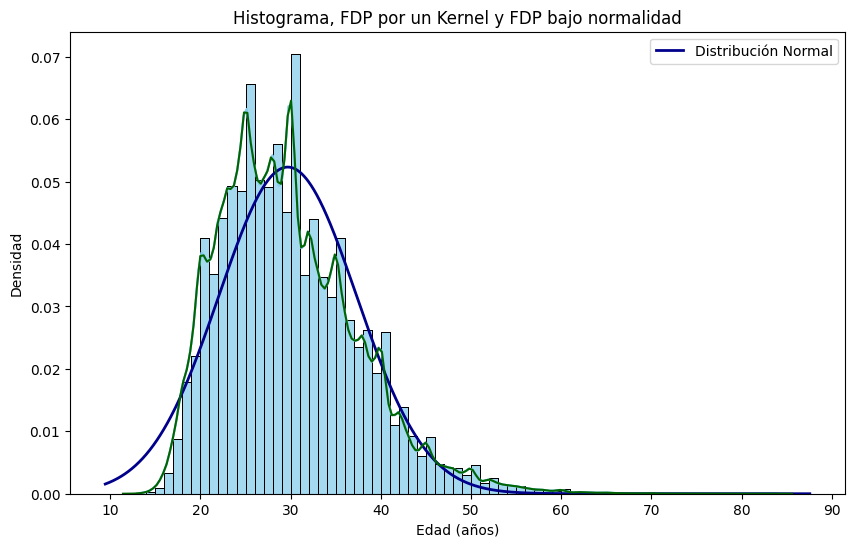

In [7]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor='black') # kde = "True" es la gráfica de la función de densidad de probabilidad estimada bajo el método Kernell
sns.histplot(x=df1.EDAD_PADRE, bins=intervalos1, kde=True, stat="density", color= "skyblue", edgecolor="black")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))

plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")
sns.kdeplot(x=df1.EDAD_PADRE, color = "darkgreen")

plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad')
plt.xlabel('Edad (años)')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

Sea $X:=$ Edad del padre de un recién nacido en Colombia.

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método Kernell (línea color cyan) no coincide con la función de densidad de probabilidad asumiendo el supuesto de normalidad (línea color azul),
$X∼\text{Normal}(\text{Media}=\bar{x},\text{Varianza}=S^2_x)$
entonces no asumimos normalidad.


In [8]:
from scipy.stats import shapiro
shapiro(df1.EDAD_PADRE)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.958814799785614, pvalue=0.0)

<ipython-input-9-8df5ecf9fb43>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")


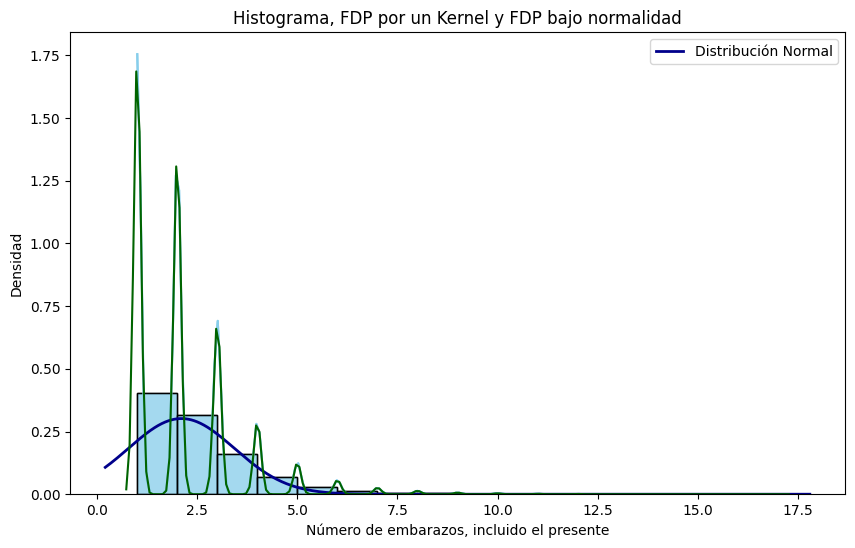

In [9]:
intervalos2 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos2, kde = True, stat = "density", color = "skyblue", edgecolor='black') # kde = True es la gráfica de la función de densidad de probabilidad estimada por un método Kernell
sns.histplot(x=df1.N_EMB, bins=intervalos2, kde=True, stat="density", color= "skyblue", edgecolor="black")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))

plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal', color = "darkblue")
sns.kdeplot(x=df1.N_EMB, color = "darkgreen")

plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad')
plt.xlabel('Número de embarazos, incluido el presente')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

Sea $X:=$ Número de embarazasos incluído el presente.

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método Kernell (línea color cyan) no coincide con la función de densidad de probabilidad asumiendo el supuesto de normalidad (línea color azul),
$X∼\text{Normal}(\text{Media}=\bar{x},\text{Varianza}=S^2_x)$
entonces no asumimos normalidad.

In [10]:
shapiro(df1.N_EMB)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7744329571723938, pvalue=0.0)

* Si el **valor** p es una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
* Si el **valor p** es una prueba de hipótesis es mayor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

Analizando los datos, tenemos que para ambos casos $(pvalue=0.0) < 0.05$. Entonces, se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia y el número de embarazos (incluido el presente), tienen distribución normal.

In [11]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)

619932

In [12]:
idx =np.random.randint(len(df1.EDAD_PADRE), size=100)
idx
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=0.8435390591621399, pvalue=6.894687043512704e-09)

In [13]:
idx =np.random.randint(len(df1.N_EMB), size=100)
idx
shapiro(df1.N_EMB.index[idx])

ShapiroResult(statistic=0.8374980688095093, pvalue=4.2051206960991294e-09)

*   Como el valor $p=6.894687043512704×10^{-9} < 0.05$, entonces se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal.
*   Como el valor $p=4.2051206960991294×10^{-8} < 0.05$, entonces se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal.



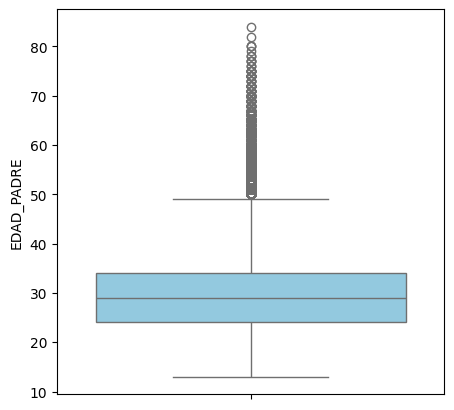

In [14]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.EDAD_PADRE, color='skyblue', saturation=0.75)
plt.show()

Haciendo un análisis de la gráfica, podemos considerar que la edad de un padre de un recién nacido en Colombia es atípica si es mayor a $50$ años. También podemos afirmar que el primer cuartil es aproximadamente $25$ años, la media aritmética es aproximadamente $29$ años y el tercer cuartil es aproximadamente $35$ años.

$\text{Rango intercuartílico}=\text{Tercer cuartil}-\text{Primer cuartil}=35-25=10$

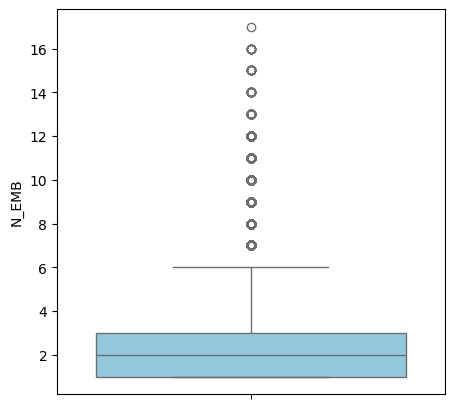

In [15]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.N_EMB, color='skyblue', saturation=0.75)
plt.show()

Siguiendo la estructura del análisis anteirior, en este caso se considera que el número de embarazos (incluido el presente), es atípico si es mayor que $6$. El primer cuartil es aproximadamente $1$ embarazo, la media aritmética es aproximadamente $2$ embarazos y el tercer cuartil es aproximadamente $3$ embarazos.

$\text{Rango intercuartílico}=\text{Tercer cuartil}-\text{Primer cuartil}=3-2=1$

In [ ]:
import plotly.express as px
plt.figure(figsize=(5, 5))
fig = px.strip(df1.EDAD_PADRE, orientation = 'h')
fig.show()

De acuerdo con el diagrama de puntos se observa una alta variabilidad de la edad de un padre de un recién Nacido en Colombia.


In [16]:
import numpy as np
from scipy.stats import skew, kurtosis

print(f"Media: {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza {np.var(df1.EDAD_PADRE)} y la desviación estándar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría: {skew(df1.EDAD_PADRE)}")
print(f"Curtosis: {kurtosis(df1.EDAD_PADRE)}")

Media: 29.67728396017628
Varianza 58.13749376325272 y la desviación estándar es de 7.624794670235568
Asimetría: 0.8353050307248143
Curtosis: 0.9739372918657319


* El promedio de la edad de un padre de un recién nacido en Colombia es aproximadamente 29.7 años.
* La distancia entre los valores de la edad un padre de un recién nacido en Colombia y la media es de mas o menos 7.62 años
* La distribución de la edad de un padre de un recién nacido en Colombia es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
* La distribución es platicúrtica, es decir, hay una baja concentración de las edades de un padre de un recién nacido en Colombia con respecto a la media.

Distribución de los datos: La media de aproximadamente $29.68$ con una desviación estándar de $7.62$ indica que la mayoría de los datos están en el rango de $[22.05,37.30]$ (aproximadamente una desviación estándar por encima y por debajo de la media).

Sesgo y Simetría: la asimetría positiva sugiere que hay una tendencia hacia valores más altos, aunque la mayor parte de los datos está a la izquierda de la media.

Forma de la Distribución: La curtosis cercana a $1$ indica que la distribución es algo más plana (platicúrtica) que una distribución normal, sugiriendo menos presencia de valores extremos .

In [17]:
print(f"Media: {np.mean(df1.N_EMB)}")
print(f"Varianza {np.var(df1.N_EMB)} y la desviación estándar es de {np.std(df1.N_EMB)}")
print(f"Asimetría: {skew(df1.N_EMB)}")
print(f"Curtosis: {kurtosis(df1.N_EMB)}")

Media: 2.102030545285612
Varianza 1.7488730440590166 y la desviación estándar es de 1.32244963762671
Asimetría: 1.9222969798771323
Curtosis: 6.016495893676325


* El promedio del número de embarazos (incluido el presente), es aproximadamente de $2.10$ embarazos.
* La distancia aproximada entre los valores de del número de embarazos (incluido el presente), y la media es de $1.322$.
* La distribución del número de embarazos (incluido el presente), es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
* La distribución es leptocúrtica, es decir, hay una alta concentración del número de embarazos, incluido el presente con respecto a la media.

A conitnuación, con ayuda de un **Diagrama de dispersión y la recta de regresión para datos bivariados**, vamos a determinar si una variable está correlacionada o depende de otras variables

* Una variable depende de la otra, cuando la ejecución de esta se ve afectada por la variable independiente. Por ejemplo, el precio de una vivienda depende del número de habitaciones, ya que entre más habitaciones se tiene mayor precio.
* Una variable está correlacionada con otra, cuando guardan cierta relación, pero no es posible hablar de dependencia. Por ejemplo, el consumo de arroz y de carne, ya que se ha visto que al comerse más arroz se come más carne, pero no hay una dependencia entre estas dos variables.

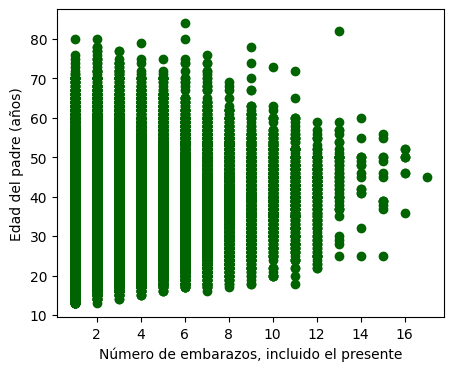

In [18]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = "darkgreen", marker = "o")
plt.xlabel('Número de embarazos, incluido el presente')
plt.ylabel('Edad del padre (años)')
plt.show()

En el diagrama de dispersión se observa una nube de puntos sin un patrón particular, lo que indica que las variables son independientes o no están correlacionadas. En nuestro ejemplo, esto significa que el número de embarazos, incluido el presente, y la edad de un padre en Colombia no están correlacionados.

In [19]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
# df1["N_EMB"] es igual a escribir df1.N_EMB
modelo.fit(np.array(df1.N_EMB).reshape(-1, 1), np.array(df1["EDAD_PADRE"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1, 1))
predi_lineal

array([[27.43380069],
       [27.43380069],
       [27.43380069],
       ...,
       [29.469573  ],
       [27.43380069],
       [27.43380069]])

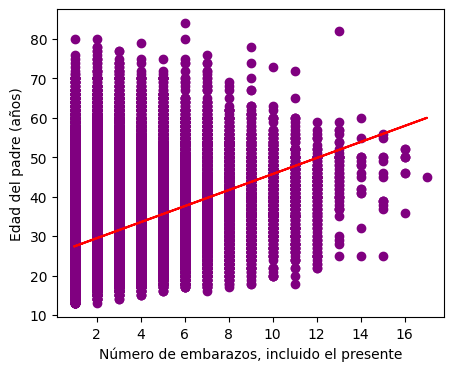

In [20]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_EMB"], df1["EDAD_PADRE"], color = "purple", marker = "o")
plt.plot(df1["N_EMB"], predi_lineal, linestyle='-', color = "red")
plt.xlabel('Número de embarazos, incluido el presente')
plt.ylabel('Edad del padre (años)')
plt.show()

De acuerdo con la recta de regresión se determina una correlación positiva, es decir que entre más embarazos incluido el presente, más años tiene esta persona.

*La variable $Y$ depende positivamente de la variable $X$, es decir, entre mayor sea el valor de $X$, mayor será el valor de $Y$.*

In [21]:
from scipy.stats import spearmanr, kendalltau
coef_pearson = np.corrcoef(df1["N_EMB"], df1["EDAD_PADRE"])[0, 1]
coef_spearman, _ = spearmanr(df1["N_EMB"], df1["EDAD_PADRE"])
coef_kendall, _ = kendalltau(df1["N_EMB"], df1["EDAD_PADRE"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_pearson}, {coef_spearman} y {coef_kendall}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3530857510781986, 0.37998015979212696 y 0.29695921176068596.


Para la interpretación de los coeficientes de correlación nos ayudaremos de la referencia:

*Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174.*

* Las varaibles $X$,$Y$ son independientes o no están correlacionadas: $ρ(X,Y)\approx{0}, η(X,Y)≈0, κ(X,Y)≈{0}$
* $Y$ depende insignificativamente de $X$ o $X,Y$ están insignificativamente correlacionadas si $0<|ρ(X,Y)|<{0.2},0<|η(X,Y)|<{0.2},0<|κ(X,Y)|<{0.2}$
* $Y$ depende discretamente de $X$ o $X,Y$ están discretamente correlacionadas si ${0.2}<|ρ(X,Y)|<{0.4}, {0.2}<|η(X,Y)|<{0.4}, {0.2}<|κ(X,Y)|<{0.4}$
* $Y$ depende moderadamente de $X$ o $X,Y$ están moderadamente correlacionadas si ${0.4}<|ρ(X,Y)|<{0.6}, {0.4}<|η(X,Y)|<{0.6}, {0.4}<|κ(X,Y)|<{0.6}$
* $Y$ depende sustancialmente de $X$ o $X,Y$ están sustancialmente correlacionadas si ${0.6}<|ρ(X,Y)|<{0.8}, {0.6}<|η(X,Y)|<{0.8}, {0.6}<|κ(X,Y)|<{0.8}$  
* $Y$ depende fuertemente de $X$ o $X,Y$ están fuertemente correlacionadas si ${0.8}<|ρ(X,Y)|<{1} {0.8}<|η(X,Y)|<{1}, {0.8}<|κ(X,Y)|<{1}$

De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determina que el número de hijos de un padre y la edad de un padre de un recién nacido en Colombia están discretamente correlacionadas.

# **Conclusión**
El estudio en relación con la edad de los padres de recien nacidos y el número de embarazos en Colombia, de la base de datos $\text{ariosgu_nac2020.csv}$, revela que ambas variables, *edad del padre* y *número de embarazos*, no siguen una distribución normal. Esto se concluye a partir de la comparación entre las funciones de densidad de probabilidad estimadas por el método Kernel y las asumidas bajo normalidad, además de los valores p significativamente menores a $0.05$.

La distribución de la edad del padre muestra una asimetría positiva y una curtosis platicúrtica. Esto sugiere que la mayoría de los padres son más jóvenes con una minoría de padres de edad significativamente mayor, con menor concentración de datos alrededor de la media. Por otro lado, la distribución del número de embarazos también es asimétrica positiva, pero con una curtosis leptocúrtica, indicando una alta concentración de datos alrededor de la media.

Aunque el diagrama de dispersión sugiere que la edad del padre y el número de embarazos no están correlacionados, la recta de regresión y los coeficientes de correlación indican una correlación positiva discreta. Este hallazgo implica que, aunque las variables no sean altamente dependientes, existe una ligera tendencia en la que los padres con más embarazos tienden a ser de mayor edad.

Desde una perspectiva demográfica, estos resultados son consistentes con tendencias observadas en otros contextos. La correlación positiva entre edad del padre y número de embarazos podría estar relacionada con factores socioculturales y económicos. Estudios como los de Menken y Trussell (1978) han mostrado que en muchas sociedades, los hombres tienden a tener hijos a una edad más avanzada en función de factores económicos y de estabilidad familiar . Además, el patrón de alta concentración alrededor de valores medios en el número de embarazos refleja tendencias demográficas observadas en sociedades en transición demográfica, donde se pasa de patrones de alta fecundidad a niveles más moderados y controlados .

Referencias:

* *Menken, J., & Trussell, J. (1978). "The timing of marriages and births." Demography, 15(1), 1-22.*
* *Lee, R. (2003). "The Demographic Transition: Three Centuries of Fundamental Change." Journal of Economic Perspectives, 17(4), 167-190.*





